In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/apurva/Desktop/github/personal/second-drafts':
  os.chdir(r'/home/apurva/Desktop/github/personal/second-drafts')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_324759/2999297244.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/zipimport.py": 1733935783.8019211, "/home/apurva/miniconda3/lib/python3.12/codecs.py": 1733935783.6539242, "/home/apurva/miniconda3/lib/python3.12/encodings/aliases.py": 1733935783.917919, "/home/apurva/miniconda3/lib/python3.12/encodings/__init__.py": 1733935783.9739177, "/home/apurva/miniconda3/lib/python3.12/encodings/utf_8.py": 1733935784.0459163, "/home/apurva/miniconda3/lib/python3.12/abc.py": 1733935783.6419244, "/home/apurva/miniconda3/lib/python3.12/io.py": 1733935783.7019231, "/home/apurva/miniconda3/lib/python3.12/stat.py": 1733935783.765922, "/home/apurva/miniconda3/lib/python3.12/_collections_abc.py": 1733935783.6579242, "/home/apurva/miniconda3/lib/python3.12/genericpath.py": 1733935783.6859236, "/home/apurva/miniconda3/lib/python3.12/posixpath.py": 1733

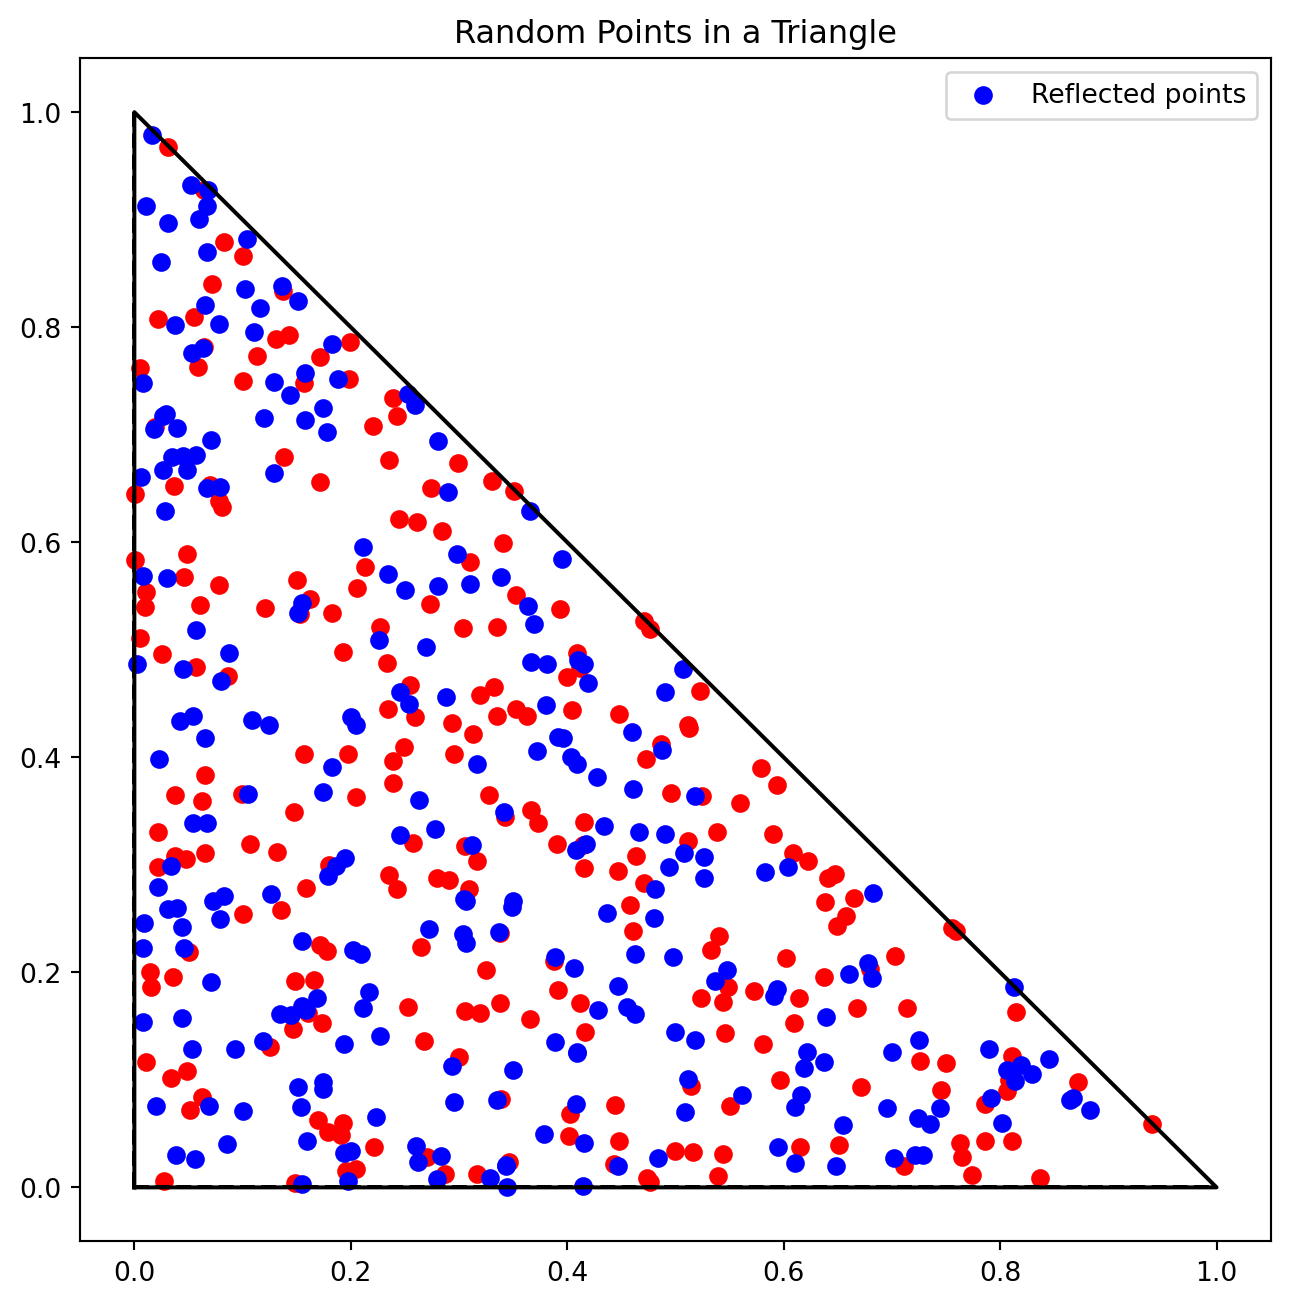

In [2]:
import numpy as np

N = 500

# generate N random vectors in 2D
square_points = np.random.rand(N, 2)

# Plot 1. the unit square, 2. the triangle, 3. the random points
import matplotlib.pyplot as plt


# Separate points into red (inside the triangle) and blue (reflected)
red_points = square_points[square_points.sum(axis=1) <= 1]
blue_points = 1 - square_points[square_points.sum(axis=1) > 1]


plt.figure(figsize=(8, 8))
plt.plot([0, 1, 0, 0], [0, 0, 1, 0], 'k-')
plt.plot([0, 1], [0, 0], 'k--')
plt.plot([0, 0], [0, 1], 'k--')

# scatter the red points
plt.scatter(red_points[:, 0], red_points[:, 1], color='red')

# scatter the blue points
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Reflected points')

# add a legend
plt.legend()
# add a title
plt.title('Random Points in a Triangle')

plt.show()

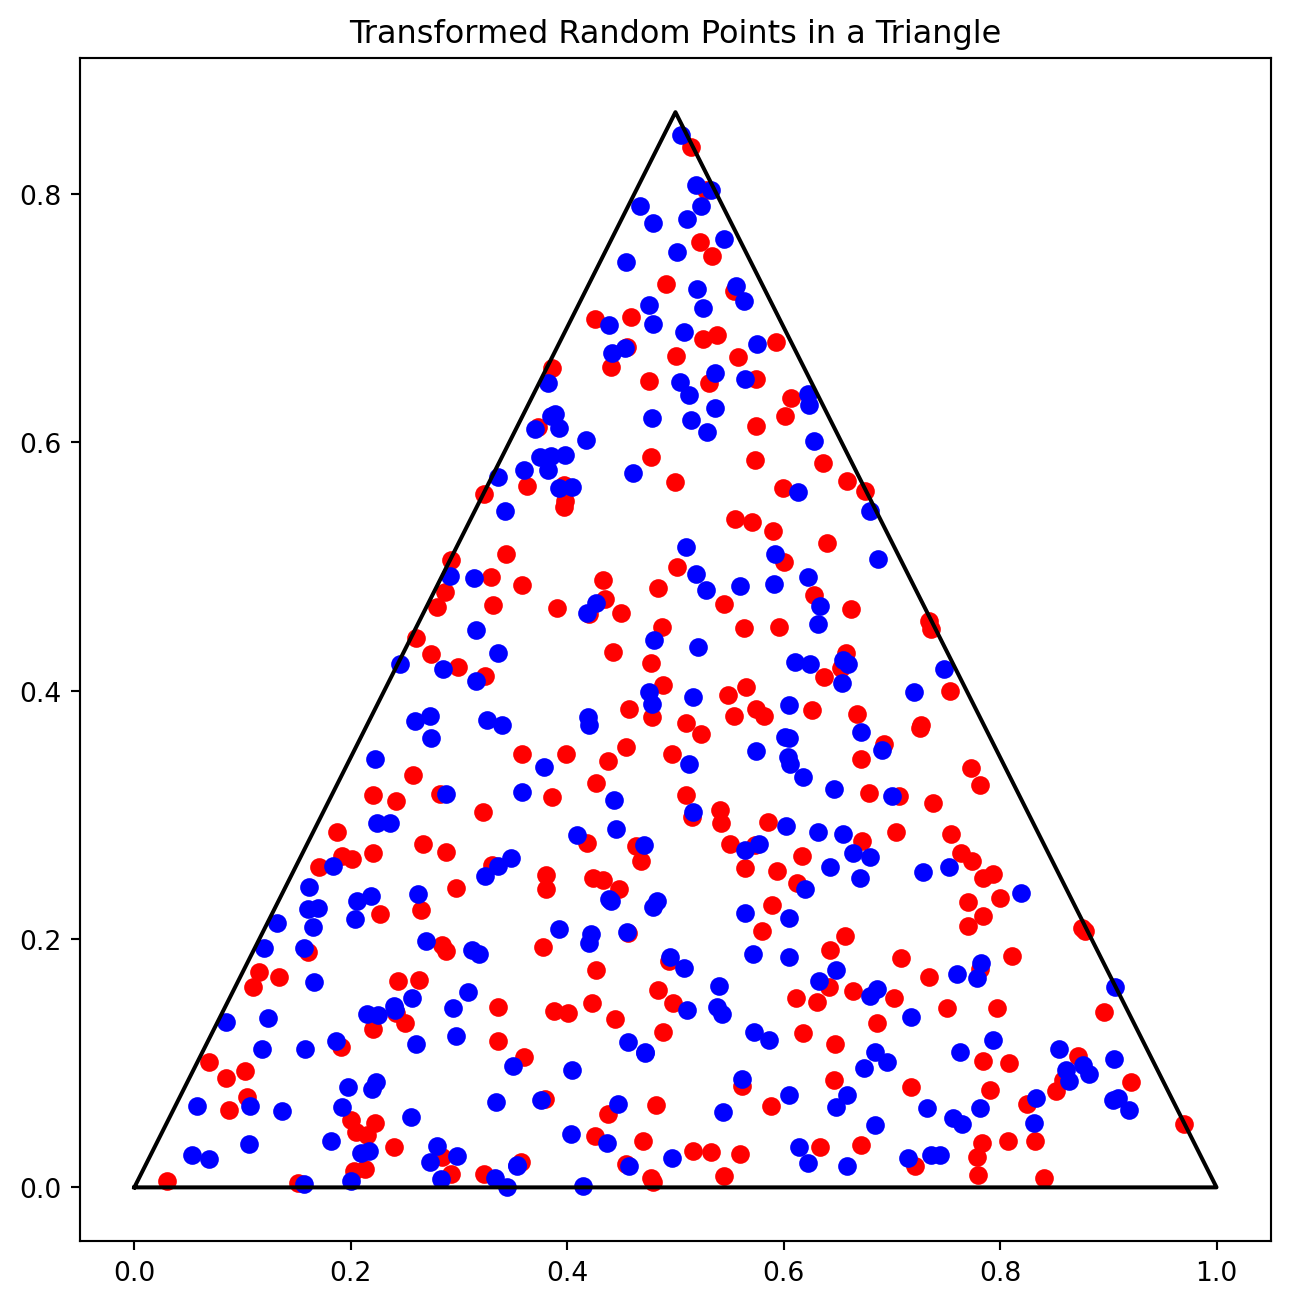

In [3]:
vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# plot the triangle
plt.figure(figsize=(8, 8))
plt.plot([vertices[0][0], vertices[1][0], vertices[2][0], vertices[0][0]],
     [vertices[0][1], vertices[1][1], vertices[2][1], vertices[0][1]], 'k-')

# use red_points as barycentric coordinates
for point in red_points:
    # barycentric coordinates
    barycentric_coords = np.array([1 - point[0] - point[1], point[0], point[1]])
    # transform the point
    transformed_point = np.dot(barycentric_coords, vertices)
    plt.scatter(transformed_point[0], transformed_point[1], color='red')


# use blue_points as barycentric coordinates
for point in blue_points:
    # barycentric coordinates
    barycentric_coords = np.array([1 - point[0] - point[1], point[0], point[1]])
    # transform the point
    transformed_point = np.dot(barycentric_coords, vertices)
    plt.scatter(transformed_point[0], transformed_point[1], color='blue')

# add a title
plt.title('Transformed Random Points in a Triangle')
plt.show()